<a href="https://colab.research.google.com/github/JonSpivak666/SGD/blob/main/gradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradiente de Descenso Estocástico (SGD)
En este notebook, implementaremos el algoritmo del gradiente de descenso estocástico para resolver un problema de regresión lineal.


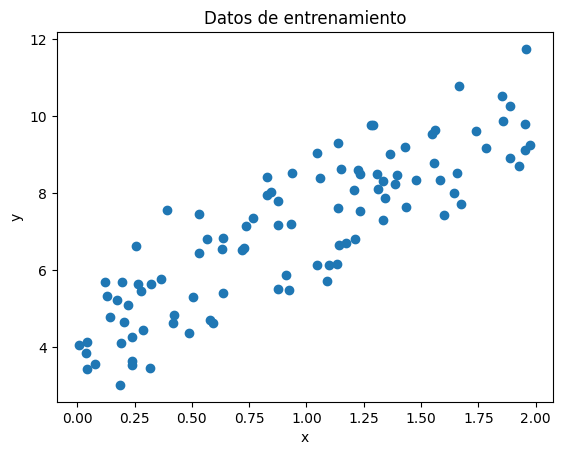

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generamos datos de ejemplo
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Visualizamos los datos
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Datos de entrenamiento")
plt.show()


## Función de Costo
Definimos la función de costo para la regresión lineal.


In [2]:
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1/2*m) * np.sum((X.dot(theta) - y)**2)
    return cost


## Gradiente de Descenso Estocástico
Implementamos el algoritmo del gradiente de descenso estocástico.


In [3]:
def stochastic_gradient_descent(X, y, theta, learning_rate=0.01, epochs=100):
    m = len(y)
    cost_history = np.zeros(epochs)

    for epoch in range(epochs):
        for i in range(m):
            rand_index = np.random.randint(0, m)
            x_i = X[rand_index:rand_index+1]
            y_i = y[rand_index:rand_index+1]
            prediction = np.dot(x_i, theta)
            theta = theta - learning_rate * (x_i.T.dot(prediction - y_i))
        cost_history[epoch] = compute_cost(X, y, theta)

    return theta, cost_history


## Ejecución del Algoritmo
Ejecutamos el algoritmo con los datos generados.


In [4]:
X_b = np.c_[np.ones((100, 1)), X]
theta_inicial = np.random.randn(2,1)

# Aplicamos el gradiente de descenso estocástico
learning_rate = 0.01
epochs = 50

theta_final, cost_history = stochastic_gradient_descent(X_b, y, theta_inicial, learning_rate, epochs)

print("Theta final:", theta_final)


Theta final: [[4.19315427]
 [3.05439942]]


## Visualización de la Convergencia
Graficamos el costo en función del número de épocas para observar la convergencia del algoritmo.


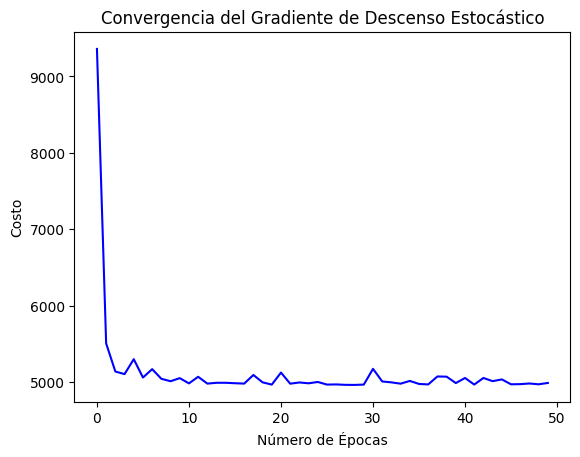

In [5]:
plt.plot(range(epochs), cost_history, 'b-')
plt.xlabel("Número de Épocas")
plt.ylabel("Costo")
plt.title("Convergencia del Gradiente de Descenso Estocástico")
plt.show()


## Resultado
Visualizamos la línea de regresión final obtenida con los parámetros optimizados.


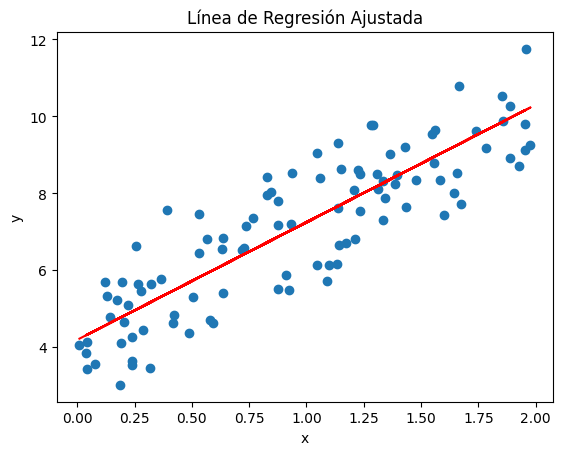

In [6]:
plt.scatter(X, y)
plt.plot(X, X_b.dot(theta_final), 'r-')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Línea de Regresión Ajustada")
plt.show()
